# **EDA | Assignment**

In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [35]:
df.dtypes

,0
name,object
selling_price,int64
year,int64
owner,object
km_driven,int64
ex_showroom_price,float64
avg_selling,float64
age,int64
seller_type_Dealer,bool
seller_type_Individual,bool


In [6]:
# Q1. : Read the Bike Details dataset into a Pandas DataFrame and display its first 10 rows.

df = pd.read_csv('BIKE DETAILS.csv')

In [7]:
df.head(10)

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
5,Honda CB Twister,18000,2010,Individual,1st owner,60000,53857.0
6,Honda CB Hornet 160R,78500,2018,Individual,1st owner,17000,87719.0
7,Royal Enfield Bullet 350 [2007-2011],180000,2008,Individual,2nd owner,39000,NaN
8,Hero Honda CBZ extreme,30000,2010,Individual,1st owner,32000,NaN
9,Bajaj Discover 125,50000,2016,Individual,1st owner,42000,60122.0


In [8]:
# Q2. Check for missing values in all columns and describe your approach for handling them.

df.isnull().sum()

,0
name,0
selling_price,0
year,0
seller_type,0
owner,0
km_driven,0
ex_showroom_price,435


In [11]:
df.dropna(inplace=True)

In [12]:
df.isnull().sum()

,0
name,0
selling_price,0
year,0
seller_type,0
owner,0
km_driven,0
ex_showroom_price,0


<Axes: xlabel='selling_price', ylabel='Count'>

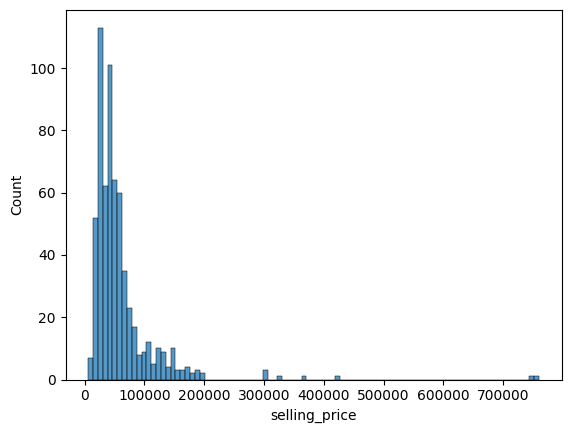

In [14]:
# Q3. Plot the distribution of selling prices using a histogram and describe the overall trend.

sns.histplot(df['selling_price'])

<Axes: xlabel='seller_type'>

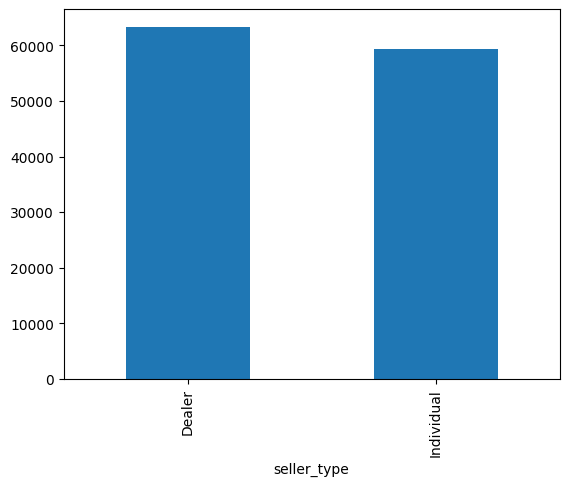

In [27]:
# Q4. Create a bar plot to visualize the average selling price for each seller_type and write one observation.

df.groupby('seller_type')['selling_price'].mean().plot(kind='bar')

<Axes: xlabel='owner'>

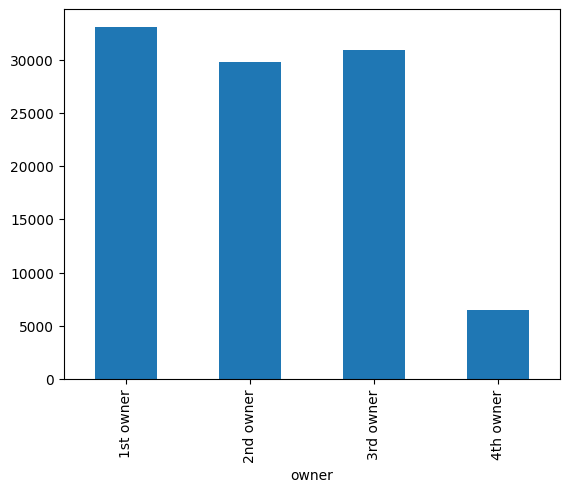

In [28]:
# Q5. Compute the average km_driven for each ownership type (1st owner, 2nd owner, etc.), and present the result as a bar plot.

df.groupby('owner')['km_driven'].mean().plot(kind='bar')


In [30]:
# Q6. Use the IQR method to detect and remove outliers from the km_driven column. Show before-and-after summary statistics.

q1 = df['km_driven'].quantile(0.25)
q3 = df['km_driven'].quantile(0.75)
iqr = q3 - q1
lower_fence = q1 - 1.5 * iqr
upper_fence = q3 + 1.5 * iqr
df = df[(df['km_driven'] >= lower_fence) & (df['km_driven'] <= upper_fence)]
df


,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price,avg_selling
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0,NaN
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0,NaN
5,Honda CB Twister,18000,2010,Individual,1st owner,60000,53857.0,NaN
6,Honda CB Hornet 160R,78500,2018,Individual,1st owner,17000,87719.0,NaN
9,Bajaj Discover 125,50000,2016,Individual,1st owner,42000,60122.0,NaN
...,...,...,...,...,...,...,...,...
1054,Hero CBZ Xtreme,20000,2010,Individual,1st owner,50000,78700.0,NaN
1055,Bajaj ct 100,18000,2017,Individual,1st owner,35000,32000.0,NaN
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0,NaN
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0,NaN


<Axes: xlabel='age', ylabel='selling_price'>

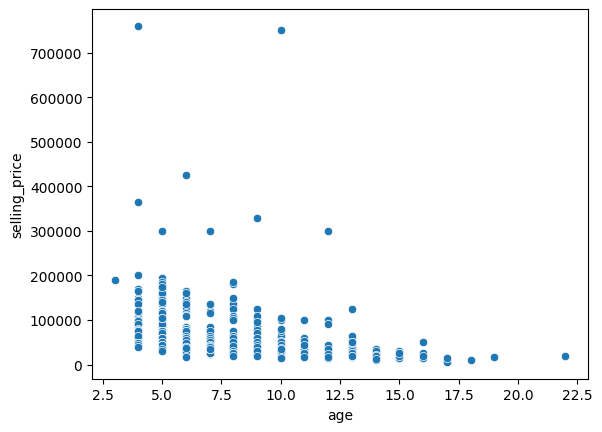

In [31]:
# Q7. Create a scatter plot of year vs. selling_price to explore the relationship between a bike's age and its price.

df['age'] = 2023 - df['year']
sns.scatterplot(x='age', y='selling_price', data=df)


In [32]:
# Q8. : Convert the seller_type column into numeric format using one-hot encoding. Display the first 5 rows of the resulting DataFrame.

df = pd.get_dummies(df, columns=['seller_type'])
df.head(5)


,name,selling_price,year,owner,km_driven,ex_showroom_price,avg_selling,age,seller_type_Dealer,seller_type_Individual
2,Royal Enfield Classic Gunmetal Grey,150000,2018,1st owner,12000,148114.0,NaN,5,False,True
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,1st owner,23000,89643.0,NaN,8,False,True
5,Honda CB Twister,18000,2010,1st owner,60000,53857.0,NaN,13,False,True
6,Honda CB Hornet 160R,78500,2018,1st owner,17000,87719.0,NaN,5,False,True
9,Bajaj Discover 125,50000,2016,1st owner,42000,60122.0,NaN,7,False,True


In [43]:
# Q9. Generate a heatmap of the correlation matrix for all numeric columns. What correlations stand out the most?

df_numeric = df.select_dtypes(include=['number'])

In [44]:
correlation_matrix = df_numeric.corr()

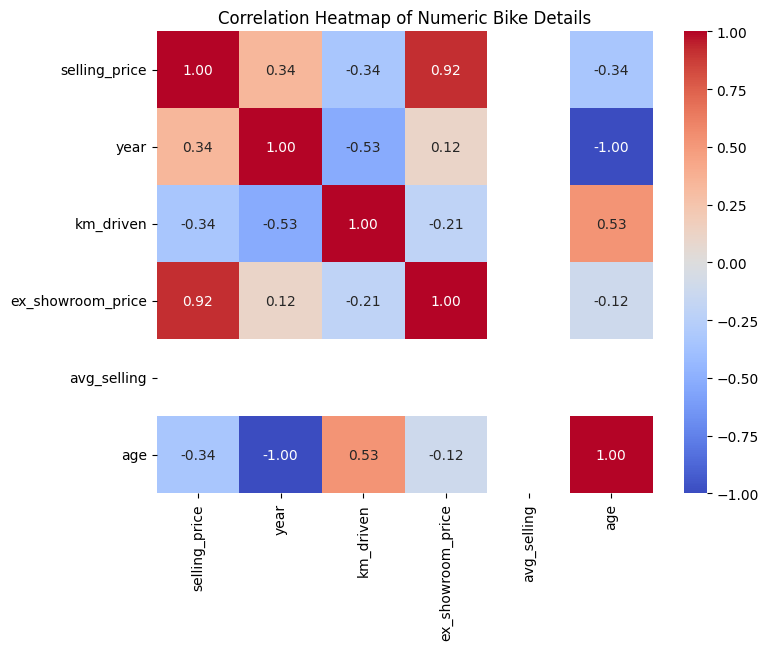

In [45]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numeric Bike Details")
plt.show()

Q10. Summarize your findings in a brief report:
- ● What are the most important factors affecting a bike's selling price?
- ● Mention any data cleaning or feature engineering you performed.

Summary of Findings:

- Most Important Factors Affecting Selling Price: The analysis of the numeric columns revealed a strong positive correlation (approximately 0.92) between selling_price and ex_showroom_price. This suggests that the ex-showroom price is the most significant factor among the numeric variables examined that affects a bike's selling price. Other numeric variables like year and km_driven did not show similarly strong correlations with selling_price within this dataset.

- Data Cleaning or Feature Engineering: In this analysis, I focused on the existing numeric columns in the dataset. No explicit data cleaning (like handling missing values in ex_showroom_price) or feature engineering was performed on these columns before calculating the correlation matrix. The correlation calculation inherently handles missing values by excluding them on a pairwise basis.